In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import model_selection

In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/My_Dataset_для_С2.txt")

In [ ]:
dataset.loc[dataset.Gender == 0.50, "Gender"] = 1 # замена значений переменных
dataset.loc[dataset.Gender == -0.50, "Gender"] = 1 # замена значений переменных
#dataset.loc[dataset.Height == -0.50, "Height"] = dataset.Height.median() 

In [ ]:
dataset.Age.unique() #Проверка возраста, значений nan нет

array([27. , 38. , 22. , 34. , 44. , 32. , 39. , 37. , 35.5, 33. , 42. ,
       38.5, 32.5, 20. , 24. , 29. , 40.5, 17.5, 13. , 40. , 26.5, 45. ,
       36. , 26. , 23. , 12. , 24.5, 41. , 21. , 36.5, 44.5, 13.5, 43.5,
       41.5, 25. , 34.5, 27.5, 30.5, 31.5, 11.5, 43. , 28. , 18. , 22.5,
       10.5, 35. , 21.5, 17. , 11. , 20.5, 14.5, 23.5, 39.5, 31. , 30. ,
       42.5, 28.5, 33.5, 15.5, 29.5, 25.5, 16.5, 19.5, 19. , 14. , 37.5,
       15. , 10. , 12.5,  9. ,  8.5,  8. ,  9.5, 18.5, 16. ,  7.5])

In [ ]:
dataset.Height.value_counts() # Слишком много пропущенных значений роста

-0.50      3824
 88.90      421
 91.45      352
 86.35      350
 85.10      345
           ... 
 199.40       1
 0.90         1
 97.15        1
 215.90       1
 86.50        1
Name: Height, Length: 81, dtype: int64

In [ ]:
dataset.RecordID.is_unique # Проверка на уникальность ID пользователей

True

In [ ]:
backup = dataset #Backup!!!!!!!

In [ ]:
dataset = backup
dataset

,RecordID,Age,Gender,Height,ICUType,MeanAlbumin,MeanALP,MeanALT,MeanAST,MeanBilirubin,...,MeanSysABP,MeanTemp,MeanTroponinI,MeanTropI,MeanTroponinT,MeanTropT,MeanUrine,MeanWBC,MeanWeight,Unnamed: 44
0,66269.5,27.0,0.0,-0.50,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,37.357143,NaN,NaN,NaN,NaN,171.052632,10.300000,-1.000000,NaN
1,66270.0,38.0,1.0,87.65,1.0,NaN,NaN,NaN,NaN,NaN,...,113.411765,36.939130,NaN,NaN,NaN,NaN,151.560976,11.266667,80.670588,NaN
2,66270.5,22.0,0.0,-0.50,1.5,2.5,116.0,83.0,199.5,2.9,...,125.687500,37.800000,NaN,NaN,NaN,NaN,124.951220,4.700000,56.700000,NaN
3,66271.5,34.0,1.0,90.15,1.5,4.4,105.0,12.0,15.0,0.2,...,NaN,36.223077,NaN,NaN,NaN,NaN,545.833333,9.400000,84.600000,NaN
4,66272.5,44.0,0.0,-0.50,1.5,3.3,NaN,NaN,NaN,NaN,...,NaN,36.880000,NaN,NaN,NaN,NaN,62.131579,4.300000,-1.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,76424.5,39.0,1.0,90.15,1.0,NaN,NaN,NaN,NaN,NaN,...,129.271186,36.854348,NaN,NaN,NaN,NaN,129.487805,16.766667,88.184444,NaN
7996,76425.5,45.0,1.0,88.90,1.5,NaN,74.0,12.0,25.0,1.0,...,117.416667,37.092857,NaN,NaN,0.142,NaN,20.333333,28.071429,87.096000,NaN
7997,76429.0,35.0,0.0,76.20,1.0,2.8,88.0,11.0,21.0,NaN,...,120.272727,36.600000,1.0,NaN,NaN,NaN,135.926829,14.333333,78.090566,NaN
7998,76431.0,24.5,0.0,-0.50,1.5,NaN,NaN,NaN,NaN,NaN,...,NaN,36.409091,NaN,NaN,NaN,NaN,324.444444,15.100000,57.000000,NaN


In [ ]:
dataset.isnull().sum() # Проверка, сколько нулевых значений в столбцах

RecordID              0
Age                   0
Gender                0
Height                0
ICUType               0
MeanAlbumin        4754
MeanALP            4621
MeanALT            4544
MeanAST            4539
MeanBilirubin      4554
MeanBUN             120
MeanCholesterol    7352
MeanCreatinine      120
MeanDiasABP        2390
MeanFiO2           2581
MeanGCS             129
MeanGlucose         201
MeanHCO3            137
MeanHCT             124
MeanHR              128
MeanK               169
MeanLactate        3602
MeanMg              186
MeanMAP            2402
MeanMechVent       2960
MeanNa              138
MeanNIDiasABP       999
MeanNIMAP          1003
MeanNISysABP        973
MeanPaCO2          1965
MeanPAO2           1966
MeanPH             1929
MeanPlatelets       130
MeanRespRate       5772
MeanSaO2           4455
MeanSysABP         2390
MeanTemp            129
MeanTroponinI      7615
MeanTropI          7999
MeanTroponinT      6195
MeanTropT          8000
MeanUrine       

In [ ]:
for_y = pd.read_csv("/content/drive/MyDrive/Outcomes_для_С1.txt") #Считывание файла для классификации

In [ ]:
X = dataset.drop(['Height','RecordID','MeanAlbumin','MeanALP', 'MeanALT', 'MeanAST', 'MeanBilirubin','MeanCholesterol', 'MeanDiasABP', 'MeanFiO2','MeanLactate', 'MeanMAP', 'MeanMechVent', 'MeanPaCO2', 'MeanPAO2', 'MeanPH', 'MeanRespRate', 'MeanSaO2', 'MeanSysABP', 'MeanTroponinI', 'MeanTropI', 'MeanTroponinT', 'MeanTropT', 'Unnamed: 44'], axis=1)
y = for_y.In_hospital_death
#Создание переменных

In [ ]:
X.isnull().sum() #Проверка X

Age                  0
Gender               0
ICUType              0
MeanBUN            120
MeanCreatinine     120
MeanGCS            129
MeanGlucose        201
MeanHCO3           137
MeanHCT            124
MeanHR             128
MeanK              169
MeanMg             186
MeanNa             138
MeanNIDiasABP      999
MeanNIMAP         1003
MeanNISysABP       973
MeanPlatelets      130
MeanTemp           129
MeanUrine          213
MeanWBC            139
MeanWeight           0
dtype: int64

In [ ]:
X = X.fillna({'MeanBUN':X.MeanBUN.median(), 'MeanCreatinine' : X.MeanCreatinine.median(),'MeanGCS' : X.MeanGCS.median(),'MeanGlucose' : X.MeanGlucose.median(),'MeanHCO3' : X.MeanHCO3.median(),'MeanHCT' : X.MeanHCT.median(),'MeanHR' : X.MeanHR.median(),'MeanK' : X.MeanK.median(),'MeanMg' : X.MeanMg.median(),'MeanNa' : X.MeanNa.median(),'MeanNIDiasABP' : X.MeanNIDiasABP.median(),'MeanNIMAP' : X.MeanNIMAP.median(),'MeanNISysABP' : X.MeanNISysABP.median(),'MeanPlatelets' : X.MeanPlatelets.median(),'MeanTemp' : X.MeanTemp.median(),'MeanUrine' : X.MeanUrine.median(),'MeanWBC' : X.MeanWBC.median()})
X.isnull().sum() #Заполнение NuN значений и проверка

Age               0
Gender            0
ICUType           0
MeanBUN           0
MeanCreatinine    0
MeanGCS           0
MeanGlucose       0
MeanHCO3          0
MeanHCT           0
MeanHR            0
MeanK             0
MeanMg            0
MeanNa            0
MeanNIDiasABP     0
MeanNIMAP         0
MeanNISysABP      0
MeanPlatelets     0
MeanTemp          0
MeanUrine         0
MeanWBC           0
MeanWeight        0
dtype: int64

**Decision** **Tree**

---



In [ ]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, plot_roc_curve, plot_precision_recall_curve

In [ ]:
clf = tree.DecisionTreeClassifier() #Создание классификатора

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33) #Разбитие датасета на тренировочное и тестовое множество

In [ ]:
X_train

,Age,Gender,ICUType,MeanBUN,MeanCreatinine,MeanGCS,MeanGlucose,MeanHCO3,MeanHCT,MeanHR,...,MeanMg,MeanNa,MeanNIDiasABP,MeanNIMAP,MeanNISysABP,MeanPlatelets,MeanTemp,MeanUrine,MeanWBC,MeanWeight
743,40.5,1.0,2.0,20.000000,1.316667,7.409091,139.833333,21.333333,30.433333,54.406250,...,2.000000,137.333333,56.653846,75.255106,115.764706,135.000000,38.061905,71.680000,11.200000,90.000000
1169,27.0,1.0,1.0,20.666667,1.166667,11.076923,123.333333,27.000000,32.600000,102.169014,...,1.433333,138.500000,49.000000,70.890000,114.666667,152.750000,37.971154,110.318182,15.350000,105.189189
4943,37.0,1.0,2.0,25.000000,0.950000,15.000000,130.000000,24.000000,27.950000,99.466667,...,2.100000,140.750000,63.666667,74.085106,107.479167,228.666667,36.946667,49.255814,9.833333,77.000000
6356,39.0,0.0,2.0,34.600000,3.840000,14.837838,170.000000,28.000000,30.940000,74.071429,...,1.980000,136.800000,43.789474,79.105789,149.736842,182.000000,36.160000,15.500000,8.525000,68.000000
6767,37.0,0.0,1.5,34.666667,0.800000,9.000000,136.000000,22.666667,29.075000,79.893939,...,2.133333,140.666667,32.363636,49.484545,83.727273,350.333333,36.857143,60.714286,12.833333,72.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,30.5,1.0,1.5,22.250000,1.000000,10.538462,100.750000,27.750000,31.150000,79.250000,...,1.980000,138.000000,48.100000,67.511000,106.333333,224.250000,36.413333,94.378378,10.950000,82.800000
468,39.0,1.0,0.5,22.333333,1.233333,15.000000,113.000000,21.666667,36.175000,60.653061,...,2.075000,140.333333,49.510204,82.380612,148.122449,146.666667,36.541667,338.333333,9.100000,-1.000000
3462,32.0,0.0,2.0,11.666667,0.400000,13.600000,129.333333,25.333333,29.120000,89.018519,...,1.825000,139.333333,56.653846,75.255106,115.764706,242.400000,37.238462,158.292683,11.933333,94.100000
2416,16.5,1.0,2.0,6.500000,0.800000,15.000000,132.000000,26.000000,30.850000,102.200000,...,1.800000,136.000000,66.425532,87.978723,131.851064,296.000000,37.858333,475.000000,11.900000,68.500000


In [ ]:
params = {"criterion":["entropy",'gini'], "max_depth":range(1,30)} #Словарик с параметрами
grid_search_cv_clf = GridSearchCV(clf, params, cv=5) #Поиск лучших параметров для обучения на кроссвалидации = 5

In [ ]:
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(1, 30)})

In [ ]:
grid_search_cv_clf.best_params_ #Получаем лучшие параметры для обучения

{'criterion': 'entropy', 'max_depth': 3}

In [ ]:
grid_search_cv_clf.best_score_ #Получаем лучший score

0.8669776119402985

In [ ]:
best_clf = grid_search_cv_clf.best_estimator_
best_clf

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [ ]:
best_clf.score(X_test, y_test) #Получаем score из тестового множества

0.843939393939394

Score в тестовом и тренировочном множестве практически равны, это говорит нам, что модель не была переобучена

In [ ]:
y_pred = best_clf.predict(X_test) #Предскажем погибших и выживших

In [392]:
print(list(y_pred).count(1),list(y_pred).count(0))

131 2509


In [ ]:
precision_score(y_test, y_pred)

0.4580152671755725

In [ ]:
recall_score(y_test, y_pred)

0.14962593516209477

In [ ]:
y_pred_prob = grid_search_cv_clf.predict_proba(X_test)
pd.DataFrame(y_pred_prob, columns=["Вероятность погибнуть","Вероятность выжить"]) #Вероятности погибнуть или выжить (не утешительные)

,Вероятность погибнуть,Вероятность выжить
0,0.962237,0.037763
1,0.962237,0.037763
2,0.962237,0.037763
3,0.962237,0.037763
4,0.962237,0.037763
...,...,...
2635,0.812658,0.187342
2636,0.812658,0.187342
2637,0.962237,0.037763
2638,0.855410,0.144590


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


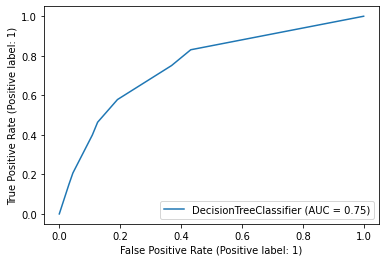

In [ ]:
plot_roc_curve(best_clf, X_test, y_test) #ROC кривая

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


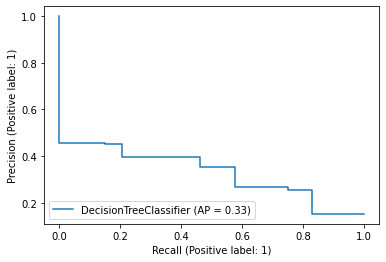

In [ ]:
plot_precision_recall_curve(best_clf, X_test, y_test) #ROC кривая по осям Precision и Recall

**Random forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
random_forest = RandomForestClassifier(n_estimators=1000)

In [ ]:
random_forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000)

In [ ]:
y_pred_2 = random_forest.predict(X_test)

In [ ]:
random_forest.score(X_train, y_train)# train score 

1.0

In [ ]:
random_forest.score(X_test, y_test) # test score

0.8477272727272728

In [ ]:
acc_random_forest = round(random_forest.score(X_train, y_train))

In [ ]:
acc_random_forest

100.0

**Nearest Neighbors**

**Регрессионная задача**

In [ ]:
from sklearn.linear_model import TweedieRegressor

In [ ]:
y_reg = for_y.Survival
y_reg.loc[y_reg<0] = 0
X_train, X_test, y_train_reg, y_test_reg = train_test_split(X, y_reg, test_size = 0.33) #Разбитие датасета на тренировочное и тестовое множество

In [ ]:
reg = TweedieRegressor(max_iter=8000)
reg.fit(X_train, y_train_reg)

TweedieRegressor(max_iter=8000)

In [ ]:
reg.score(X_train, y_train_reg)

0.04050556196626298

In [ ]:
reg.coef_

array([ 4.21829545e+00, -1.09379624e+00, -3.24461154e+00,  1.85834389e-01,
        3.23846904e+00,  4.61327060e+00,  1.05993303e-01,  2.49836122e+00,
        1.10966605e-02,  1.66998823e-01,  9.89848354e-01, -6.17935676e+00,
       -9.13728592e-01, -1.03867073e+01,  1.11913228e+01, -1.57598596e+00,
       -3.22196734e-02,  2.33410930e+00,  2.83690120e-03,  5.73429220e-02,
       -1.27271270e-01])

In [ ]:
reg.intercept_

-161.63626291604234

In [ ]:
reg.predict(X_test)

array([150.90041843, 119.31795179, -33.60214045, ..., 148.0745373 ,
        90.81148572, 161.57820926])

**DecisionTreeRegressor**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
regressor = DecisionTreeRegressor()
cross_val_score(regressor, X_train, y_train, cv=5).mean()

-1.1439795138598792

In [ ]:
regressor.fit(X_train, y_train_reg)

DecisionTreeRegressor()

In [ ]:
regressor.predict(X_test)

array([  0.,   0.,   4., ...,  26., 427.,   0.])